# Task 7

### Task variables

- *n* - Number of nodes in the graph.
- *p* - The chance of connecting any two given nodes, values from [0, 1].
- *N* - The number of repeated simulations.
- *M* - The number of simulations with connected graphs, *M <= N*. 

### The code

The code is using numpy arrays because there proved to be faster for the experiment than the [*networkx*](https://networkx.org/documentation/networkx-1.0/reference/generated/networkx.binomial_graph.html) library.

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components


def generate_graph(n, p):
    """Generates an undirected graph with n nodes
      and chance p for vertex between each two nodes."""
    array = np.random.binomial(1, p, (n, n))
    matrix = np.triu(array, k=1)

    return csr_matrix(matrix)


def is_graph_connected(graph):
    """Checks if the given graph is connected."""
    count_components, _ = connected_components(
        csgraph=graph, directed=False, return_labels=True
    )
    return count_components == 1


def largest_connected_subgraph(graph):
    """Checks the number of nodes in the largest connected subgraph of the given graph."""
    _, labels = connected_components(csgraph=graph, directed=False, return_labels=True)
    _, counts = np.unique(labels, return_counts=True)
    return np.max(counts)


def first_experiment(n, p):
    """Function that represent the first experiment - is a graph connected."""
    graph = generate_graph(n, p)
    return is_graph_connected(graph)


def second_experiment(n, p):
    """Function that represent the second experiment - largest connected subgraph."""
    graph = generate_graph(n, p)
    return largest_connected_subgraph(graph)


def get_proportion(n, p, total_tries):
    """Repeats a given experiment N (total_tries) times.
    Returns the proportion of the connected graphs against all generated.
    """
    results = np.array([first_experiment(n, p) for _ in range(total_tries)])
    return np.count_nonzero(results) / total_tries


def get_average_size(n, p, total_tries):
    """Repeats a given experiment N (total_tries) times.
    Returns the mean of the second experiment - sizes of largest connected subgraph.
    """
    results = np.array([second_experiment(n, p) for _ in range(total_tries)])
    return results.mean()


def try_different_probabilities(
    grouped_experiment, n, total_tries, count_of_p=100, lower_p=0, upper_p=1
):
    """Repeats a group of experiments with multiple values of p.
    The values of p are in the range lower_p and upper_p inclusive.
    The values are split evenly between the given range count_of_p times.
    """
    probabilities = np.linspace(lower_p, upper_p, endpoint=True, num=count_of_p)
    results = np.array([grouped_experiment(n, p, total_tries) for p in probabilities])

    return probabilities, results


def get_table_for_different_probabilities(
    experiment, n, total_tries, count_of_p=100, lower_p=0, upper_p=1
):
    """Returns a dataframe containing the results of a group of experiments with multiple values of p."""
    probabilities, results = try_different_probabilities(
        experiment,
        n,
        total_tries,
        count_of_p=count_of_p,
        upper_p=upper_p,
        lower_p=lower_p,
    )
    return pd.DataFrame({"p": probabilities, "results": results})


def plot_df_ratios(df):
    """Plots the dataframe of ratios"""
    plt.plot(df["p"], df["results"])
    plt.ylabel("Ratio M/N")
    plt.xlabel("Probability (p)")
    plt.title(
        "Proportion of number of connected graphs against all generated for different probabilities p"
    )
    plt.show()


def plot_df_subgraph(df):
    """Plots the dataframe of largest subgraph"""
    plt.plot(df["p"], df["results"])
    plt.ylabel("Size")
    plt.xlabel("Probability (p)")
    plt.title("Size of largest connected subgraph for different probabilities p")
    plt.show()

## Experiment 1

Checking the ratio of connected graphs against all generated.

### Number of vertexes n = 10

As the chance for two vertexes to be connected increases, the number of connected graphs also does. The ratio of connected graphs to all starts to be 1.

Since there are only 100 attempts the average is gonna have some deviation.

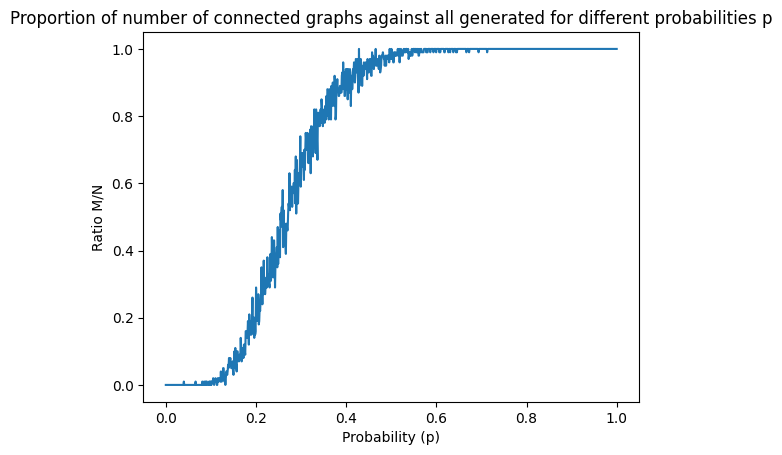

In [91]:
n = 10
count_of_p = 1000
N = 100

df = get_table_for_different_probabilities(get_proportion, n, N, count_of_p=count_of_p)
plot_df_ratios(df)

If we repeat it 10000 times but lower the division of p:

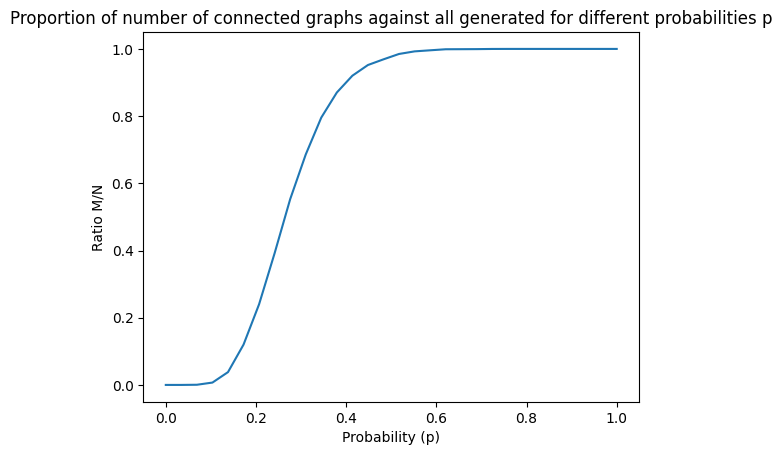

In [92]:
n = 10
count_of_p = 30
N = 10000

df = get_table_for_different_probabilities(get_proportion, n, N, count_of_p=count_of_p)
plot_df_ratios(df)

We can see that when p > 0.5 almost always the graph is connected.

### Number of vertexes n = 100

When n = 100, the graph is almost always connected when p >= 0.1

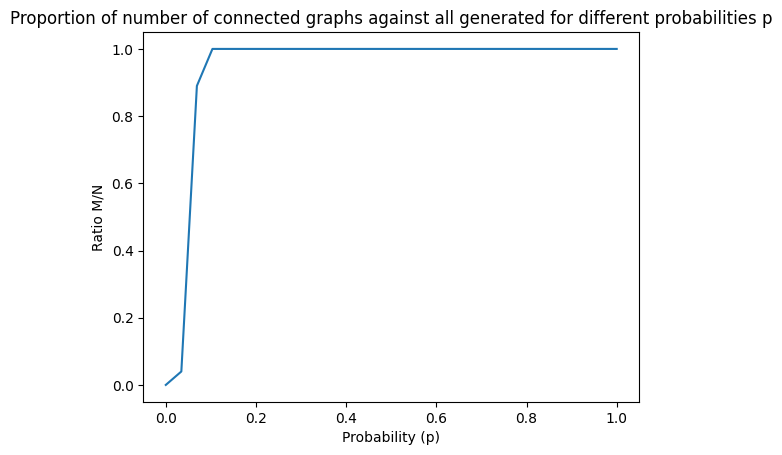

In [ ]:
n = 100
count_of_p = 30
N = 1000

df = get_table_for_different_probabilities(get_proportion, n, N, count_of_p=count_of_p)
plot_df_ratios(df)

Lowering the window of p = [0, 0.1]

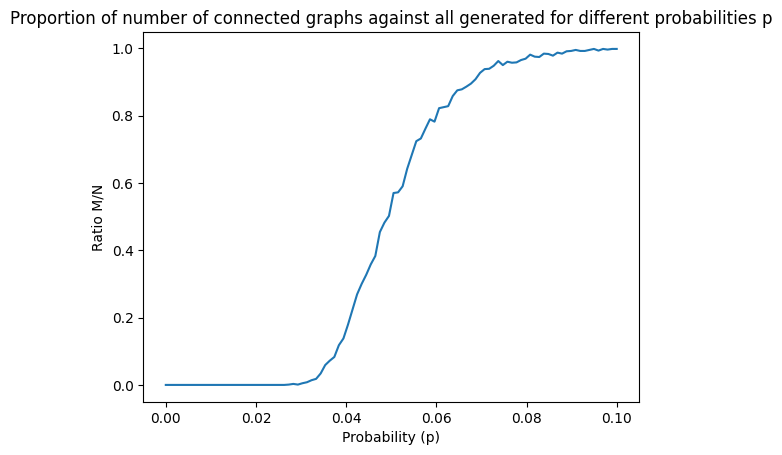

In [94]:
n = 100
count_of_p = 100
N = 1000
upper_p = 0.1

df = get_table_for_different_probabilities(
    get_proportion, n, N, count_of_p=count_of_p, upper_p=upper_p
)
plot_df_ratios(df)

### Number of vertexes n = 1000

When n = 1000 the graph is almost always connected when p >= 0.0125

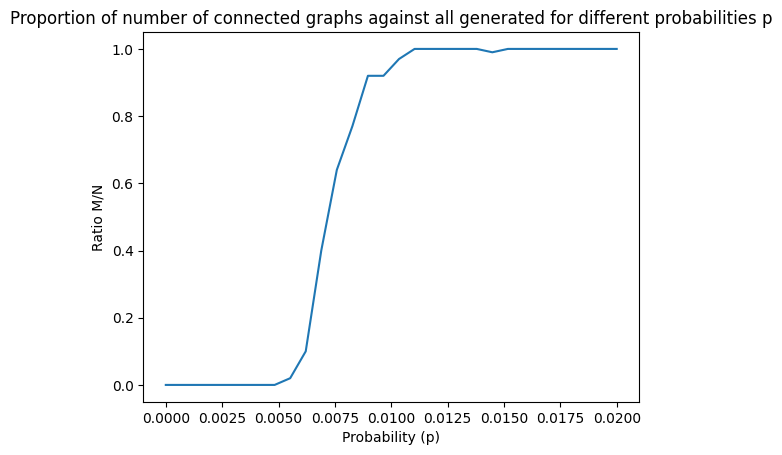

In [95]:
n = 1000
count_of_p = 30
N = 100
upper_p = 0.02

df = get_table_for_different_probabilities(
    get_proportion, n, N, count_of_p=count_of_p, upper_p=upper_p
)
plot_df_ratios(df)

### Number of vertexes n = 10,000

For n = 10,000 -> p >= 0.001

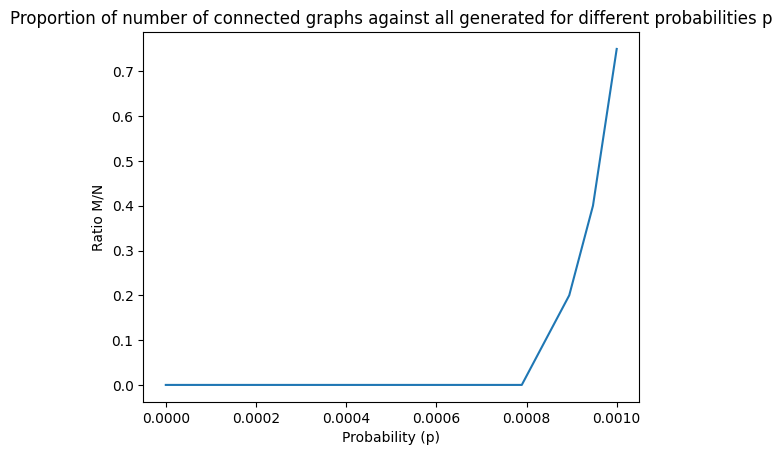

In [96]:
n = 10_000
count_of_p = 20
N = 20
upper_p = 0.001

df = get_table_for_different_probabilities(
    get_proportion, n, N, count_of_p=count_of_p, upper_p=upper_p
)
plot_df_ratios(df)

### Observations

For values of:
- *p <= ln(ln(n))/n*, the graph is almost always disconnected.
- *p >= sqrt(n)/n*, the graph is almost always connected.

For *p =* function with complexity bigger than *ln(n)/n* the graph is more likely to be connected. While if the function is slower than *ln(n)/n* the graph is more likely to be disconnected.


In [97]:
from math import log, sqrt

n = 100
N = 100_000

In [99]:
p = log(log(n)) / n

ratio = get_proportion(n, p, N)
print(f"{ratio} chance for connected graph when p = {p:.5f}, n = {n}")

0.0 chance for connected graph when p = 0.01527, n = 100


In [100]:
p = sqrt(n) / n

ratio = get_proportion(n, p, N)
print(f"{ratio} chance for connected graph when p = {p:.5f}, n = {n}")

0.99713 chance for connected graph when p = 0.10000, n = 100


In [101]:
p = log(n) / n

ratio = get_proportion(n, p, N)
print(f"{ratio} chance for connected graph when p = {p:.5f}, n = {n}")

0.38901 chance for connected graph when p = 0.04605, n = 100


Representing the values in a table:

In [102]:
def observe_proportion_for_specific_p(n, N):
    values_p = [log(log(n)) / n, log(n) / n, sqrt(n) / n]

    ratios = np.array([get_proportion(n, p, N) for p in values_p])
    return pd.DataFrame({"n": n, "p": values_p, "M/N": ratios})


observe_proportion_for_specific_p(100, 10_000)

,n,p,M/N
0,100,0.015272,0.0000
1,100,0.046052,0.3841
2,100,0.100000,0.9969


In [103]:
observe_proportion_for_specific_p(10_000, 50)

,n,p,M/N
0,10000,0.000222,0.00
1,10000,0.000921,0.36
2,10000,0.010000,1.00


## Experiment 2

Checking the average count of nodes in the largest connected subgraph.

In [164]:
n = 10
p = 0.3
total_tries = 100_000
get_average_size(n, p, total_tries)

9.43669

### Number of vertexes n = 100

When the size of the largest subgraph equals *n* the whole graph is connected.

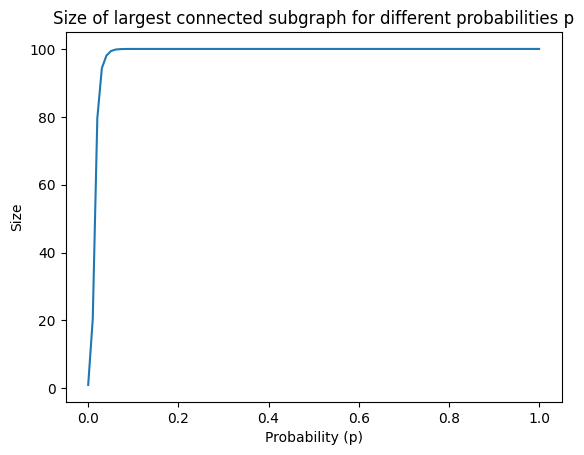

In [171]:
n = 100
count_of_p = 100
N = 1_000

df = get_table_for_different_probabilities(
    get_average_size, n, N, count_of_p=count_of_p
)
plot_df_subgraph(df)

### Number of vertexes n = 1000

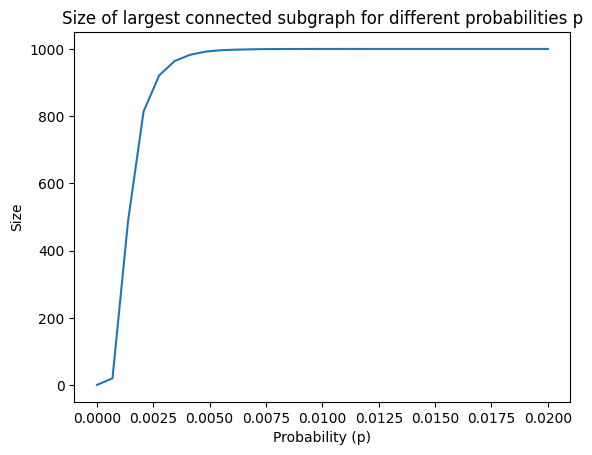

In [170]:
n = 1000
count_of_p = 30
N = 100
upper_p = 0.02

df = get_table_for_different_probabilities(
    get_average_size, n, N, count_of_p=count_of_p, upper_p=upper_p
)
plot_df_subgraph(df)

### Number of vertexes n = 10,000

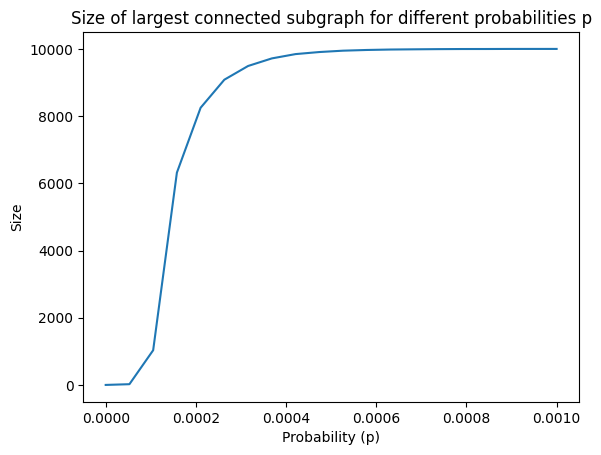

In [172]:
n = 10_000
count_of_p = 20
N = 20
upper_p = 0.001

df = get_table_for_different_probabilities(
    get_average_size, n, N, count_of_p=count_of_p, upper_p=upper_p
)
plot_df_subgraph(df)

### Observation

For values of *p* that are less than *1/n*, the largest subgraph **is not** close to the number of all nodes *n*.

For values *p =* function faster than *1/n* the number of nodes **is** close to *n*

In [181]:
def observe_subgraph_for_specific_p(n, N):
    values_p = [1 / n, log(log(n)) / n, log(n) / n, sqrt(n) / n, 1 / log(n)]

    ratios = np.array([get_average_size(n, p, N) for p in values_p])
    return pd.DataFrame({"n": n, "p": values_p, "size": ratios})


observe_subgraph_for_specific_p(100, 10_000)

,n,p,size
0,100,0.010000,19.7854
1,100,0.015272,55.7403
2,100,0.046052,99.0091
3,100,0.100000,99.9978
4,100,0.217147,100.0000


In [182]:
observe_subgraph_for_specific_p(1_000, 100)

,n,p,size
0,1000,0.001000,96.25
1,1000,0.001933,773.29
2,1000,0.006908,998.93
3,1000,0.031623,1000.00
4,1000,0.144765,1000.00


In [183]:
observe_subgraph_for_specific_p(10_000, 20)

,n,p,size
0,10000,0.000100,444.30
1,10000,0.000222,8449.55
2,10000,0.000921,9998.90
3,10000,0.010000,10000.00
4,10000,0.108574,10000.00


In conclusion, the experiment replicates the observations that [*Erdös and Reni*](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) have made. 